Import all required variables/ libraries from main

In [1]:
from main import data, pd, plt, train_test_split, GaussianNB, accuracy_score, DecisionTreeClassifier,  plot_tree, sns, apriori, association_rules, X_data, target, Dense, Sequential, export_graphviz, MinMaxScaler, RobustScaler, tree, gv
import constants
import utils
import pprint

pp = pprint.PrettyPrinter(indent=4)

2023-01-03 18:11:08.551772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 18:11:08.665668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 18:11:08.665685: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-03 18:11:09.295694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Print data

In [2]:
data

,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen_Tonsils,HIV_Infection,STI,MonkeyPox
Patient_ID,,,,,,,,,,
P0,None,False,True,True,True,False,True,False,False,Negative
P1,Fever,True,False,True,True,False,False,True,False,Positive
P2,Fever,False,True,True,False,False,False,True,False,Positive
P3,None,True,False,False,False,True,True,True,False,Positive
P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...
P24995,None,True,True,False,True,True,False,False,True,Positive
P24996,Fever,False,True,True,False,True,True,True,True,Positive
P24997,None,True,True,False,False,True,True,False,False,Positive


Print info about data (if null, occurrence, datatypes etc.)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, P0 to P24999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Systemic_Illness  25000 non-null  object
 1   Rectal_Pain       25000 non-null  bool  
 2   Sore_Throat       25000 non-null  bool  
 3   Penile_Oedema     25000 non-null  bool  
 4   Oral_Lesions      25000 non-null  bool  
 5   Solitary_Lesion   25000 non-null  bool  
 6   Swollen_Tonsils   25000 non-null  bool  
 7   HIV_Infection     25000 non-null  bool  
 8   STI               25000 non-null  bool  
 9   MonkeyPox         25000 non-null  object
dtypes: bool(8), object(2)
memory usage: 781.2+ KB


Plots data, shows the distribution of MonkeyPox (how often it is negative or positive)

In [4]:
series = data[constants.MONKEY_POX].value_counts()

plt.bar(series.index, series.values, color=constants.COLOR_PALETTE)
plt.title('Cases of Monkey Pox seperated by positive and negative')
plt.ylabel('Number of infections')
plt.show()

Shows True/ False distribution of all symptoms, containing bool-values

In [5]:
symptoms = data.iloc[:, 1:-1].columns.values.tolist()
# Gets columns from dataframe and saves them as a list containing mulitple series
series_symptom_lst = [data[symptom].value_counts() for symptom in symptoms]
df_symptoms_series = pd.DataFrame()
# Generate dataframe from list of series and transposes it
df_symptoms_series= df_symptoms_series.append(series_symptom_lst).T
#df_symptoms_series = pd.DataFrame.from_records(series_symptom_lst).T
df_symptoms_series

/tmp/ipykernel_45403/1047321577.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_symptoms_series= df_symptoms_series.append(series_symptom_lst).T


,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen_Tonsils,HIV_Infection,STI
False,12655,12446,12388,12514,12473,12467,12416,12554
True,12345,12554,12612,12486,12527,12533,12584,12446


Plots True/ False distribution of all symptoms, containing bool-values

In [6]:
pos_lst, negative_lst = utils.create_outcome_lists(symptoms, df_symptoms_series, False, True)
# Plot pos_lst and negative_lst
utils.plot_data(symptoms, pos_lst, negative_lst, 'Symptoms', 'Number of infections', 'outcome', 'True', 'False')

Plots data, when features, containing bool-values are True and MonkeyPox is Positive

In [7]:
symptoms_df = data.iloc[:, 1:]
symptoms_df = utils.fetch_true_symptoms(symptoms, symptoms_df)

pos_lst, negative_lst = utils.create_outcome_lists(symptoms, symptoms_df, constants.NEGATIVE, constants.POSITIVE)
utils.plot_data(symptoms, pos_lst, negative_lst, 'Symptoms', 'Number of infections', 'outcome', constants.POSITIVE, constants.NEGATIVE )

Plots distribution of column Systemic_Illness, using a bar chart

In [8]:
sns.countplot(x=data[constants.SYSTEMIC_ILLNESS], hue=data[constants.MONKEY_POX], palette=constants.COLOR_PALETTE)
plt.show()

Shows correlations between the different features

In [9]:
df_corr  = data.corr(numeric_only=True)
df_corr

,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen_Tonsils,HIV_Infection,STI
Rectal_Pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666
Sore_Throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901
Penile_Oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722
Oral_Lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725
Solitary_Lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849
Swollen_Tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469
HIV_Infection,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309
STI,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000


Plots correlation-dataframe, by using a heatmap

In [10]:
sns.heatmap(df_corr, annot=True, vmin=0.5, vmax=0.7)
plt.show()

Alters dataframe, values of the feature: Systemic_Illness are added as new columns

In [11]:
# Dataframe, containing the values from feature: Systemic_Illness as columns
symptoms_df = utils.clean_data(data)
symptoms_df

/home/linus/Daten_Linus/Studium/IW7/Data_Mining/Project_Data_Mining/utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat[col][index] = True


,Fever,None,Swollen Lymph Nodes,Muscle Aches and Pain,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen_Tonsils,HIV_Infection,STI
P1,True,False,False,False,True,False,True,True,False,False,True,False
P2,True,False,False,False,False,True,True,False,False,False,True,False
P3,False,True,False,False,True,False,False,False,True,True,True,False
P4,False,False,True,False,True,True,True,False,False,True,True,False
P6,True,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
P24994,True,False,False,False,False,True,True,False,False,False,True,True
P24995,False,True,False,False,True,True,False,True,True,False,False,True
P24996,True,False,False,False,False,True,True,False,True,True,True,True
P24997,False,True,False,False,True,True,False,False,True,True,False,False


Calculates lift, confidence, support etc. for all possible feature combinations

In [12]:
frequency = apriori(symptoms_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequency, metric='lift')
rules.sort_values('confidence', ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20250,"(STI, None, Swollen_Tonsils, Oral_Lesions, Pen...",(Rectal_Pain),0.015086,0.546986,0.009114,0.604167,1.104538,0.000863,1.144456
36019,"(STI, Swollen Lymph Nodes, Swollen_Tonsils, Or...",(Sore_Throat),0.010246,0.526117,0.006160,0.601227,1.142762,0.000770,1.188352
19692,"(STI, None, Sore_Throat, Oral_Lesions, HIV_Inf...",(Rectal_Pain),0.014646,0.546986,0.008737,0.596567,1.090643,0.000726,1.122896
31115,"(STI, Fever, Sore_Throat, Oral_Lesions, Penile...",(Solitary_Lesion),0.010874,0.515243,0.006474,0.595376,1.155524,0.000871,1.198042
20002,"(Solitary_Lesion, None, Swollen_Tonsils, Oral_...",(Rectal_Pain),0.013452,0.546986,0.007983,0.593458,1.084960,0.000625,1.114310
...,...,...,...,...,...,...,...,...,...
37903,(Rectal_Pain),"(STI, Swollen_Tonsils, Sore_Throat, Muscle Ach...",0.546986,0.009491,0.005029,0.009193,0.968583,-0.000163,0.999699
37776,(HIV_Infection),"(STI, Sore_Throat, Muscle Aches and Pain, Oral...",0.558615,0.009303,0.005091,0.009114,0.979740,-0.000105,0.999810
36642,(HIV_Infection),"(STI, Swollen Lymph Nodes, Swollen_Tonsils, Or...",0.558615,0.010120,0.005029,0.009002,0.889512,-0.000625,0.998872
37902,(HIV_Infection),"(STI, Swollen_Tonsils, Sore_Throat, Muscle Ach...",0.558615,0.010057,0.005029,0.009002,0.895071,-0.000589,0.998935


Plots data, using pairplot

In [ ]:
#sns.pairplot(data.head(100), hue='MonkeyPox')

Calculates accuracy, using GaussianNB()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target)

model = GaussianNB()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
print('Accuracy: {:.2f}'.format(100 * accuracy_score(y_test, y_prediction)))
print('R² of train-data: {:.2f}'.format(model.score(X_train, y_train)))
print('R² of test-data: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy: 67.92
R² of train-data: 0.68
R² of test-data: 0.68


Creates and plots DecisionTree, by using entropy

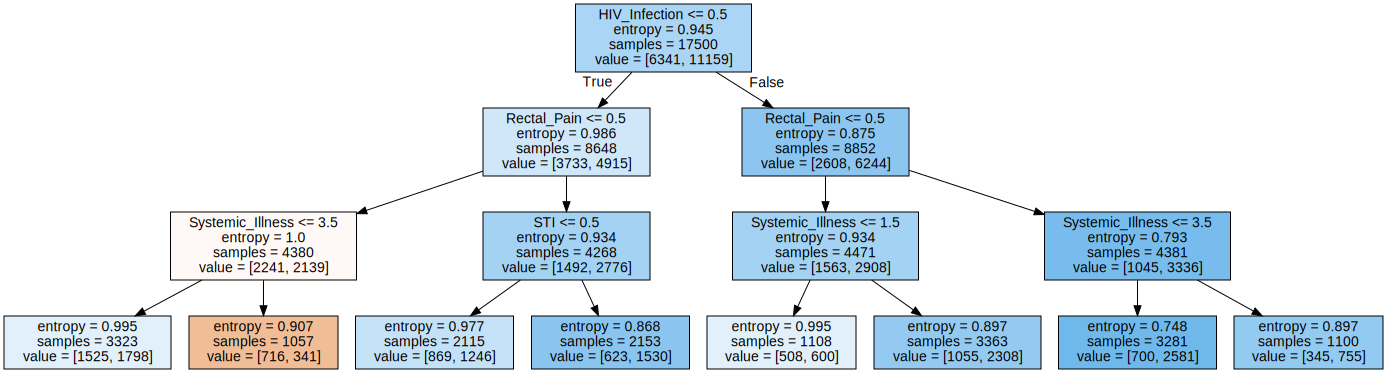

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target, test_size=0.30)
model_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=0.20)
model_tree.fit(X_train, y_train)
#
# y_prediction = model_tree.predict(X_test)

# Plot decisiontree
# figure = plt.figure(figsize=(10,8))
# plot_tree(model_tree, feature_names=X_train.columns, filled=True, rounded=True)
# plt.show()
tree.dot = export_graphviz(model_tree, filled=True, feature_names=X_test.columns)
graph = gv.Source(tree.dot)
graph

Calculates accuracy for all possible feature combinations, using three different models

In [15]:
acc_dict = utils.create_feature_accuracy_dict(X_data, target)
# Sort dictionary in a descending manner and save the top 5 elements
top_items = sorted(acc_dict.items(), key = lambda x: x[1], reverse=True)[:5]
pp.pprint(top_items)


KeyboardInterrupt



Tries to detect overfitting by plotting the test and train data

In [16]:
utils.check_over_fitting(X_data, target)

Builds neural network, which contains three hidden layers.

In [ ]:
model = Sequential()

X, y = utils.prepare_for_tensor(X_data, target)


# first layer with 9 input-nodes (Dense = connect with all following nodes)
model.add(Dense(14, input_dim=X_data.shape[1], activation='sigmoid', name='input'))

# 35 hidden nodes in the first and second layer
model.add(Dense(20, activation='relu', name='layer1'))
model.add(Dense(20, activation='relu', name='layer2'))
model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

solution = model.evaluate(X_train, y_train)

print("{}: {:.2f}\n{}: {:.2f}".format(model.metrics_names[0], solution[0],
                                      model.metrics_names[1], solution[1]))

solution = model.evaluate(X_test, y_test)
print("{}: {:.2f}\n{}: {:.2f}".format(model.metrics_names[0], solution[0],
                                      model.metrics_names[1], solution[1]))

#y_predict = model.predict(data_x, batch_size=16, verbose=0 / 1 / 2, steps=100)

model.summary()

Plots the neural network

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_data=(X_test, y_test))
evaluation = pd.DataFrame.from_dict(hist.history)
fig = plt.figure(figsize=(20, 8), num='Neural Network')
img1 = fig.add_subplot(121)
img1.plot(evaluation.index, evaluation.iloc[:, 0], color=constants.FIRST_COLOR, label='Train-data')
img1.plot(evaluation.index, evaluation.iloc[:, 2], color=constants.SECOND_COLOR, label='Validation-data')
img1.legend()
img1.set_xlabel('epoch')
img1.set_ylabel(model.metrics_names[0])
img1.set_title('Neural Network learns - Loss curve')
img2 = fig.add_subplot(122)
img2.plot(evaluation.index, evaluation.iloc[:, 1], color=constants.FIRST_COLOR, label='Train-data')
img2.plot(evaluation.index, evaluation.iloc[:, 3], color=constants.SECOND_COLOR, label='Validation-data')
img2.legend()
img2.set_xlabel('epoch')
img2.set_ylabel(model.metrics_names[1])
img2.set_title('Neural Network learns - Accuracy curve')
plt.show()